# Stitch single channel data

In [9]:
import pipapr
import matplotlib.pyplot as plt

Let's start by parsing a data-set:

In [10]:
path = '../../../tests/data/apr'
tiles = pipapr.tileParser(path=path, ftype='apr', frame_size=512)


**********  PARSING DATA **********
../../../tests/data/apr
Tiles are of type apr.
13 tiles were detected.
4 rows and 4 columns.
***********************************



The data-set can then be quickly displayed by using the stitcher module using the expected tile position given the overlap and confirm that the data was parsed correctly.

In [11]:
stitcher_expected = pipapr.tileStitcher(tiles, overlap_h=25, overlap_v=25)
stitcher_expected.compute_expected_registration()

To do so, we provide a lazy reconstructor with the stitcher to display a cross-section (or a max projection) of stitched data-set along any given dimension:

In [8]:
_ = stitcher_expected.reconstruct_slice(color=True, n_proj=10, progress_bar=False)

# The code below is only used to format the output image correctly for this tutorial and is not needed if used on your own machine
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

TqdmKeyError: "Unknown argument(s): {'progress_bar': False}"

As you can see on the image above, there are doubling artifacts arising from tiles misalignment. To actively counteract these misalignments, the registration between tiles can be computed:

Computing max. proj.: 100%|██████████| 13/13 [00:00<00:00, 27.44it/s]


Effective horizontal overlap: 25.29%
Effective vertical overlap: 24.71%


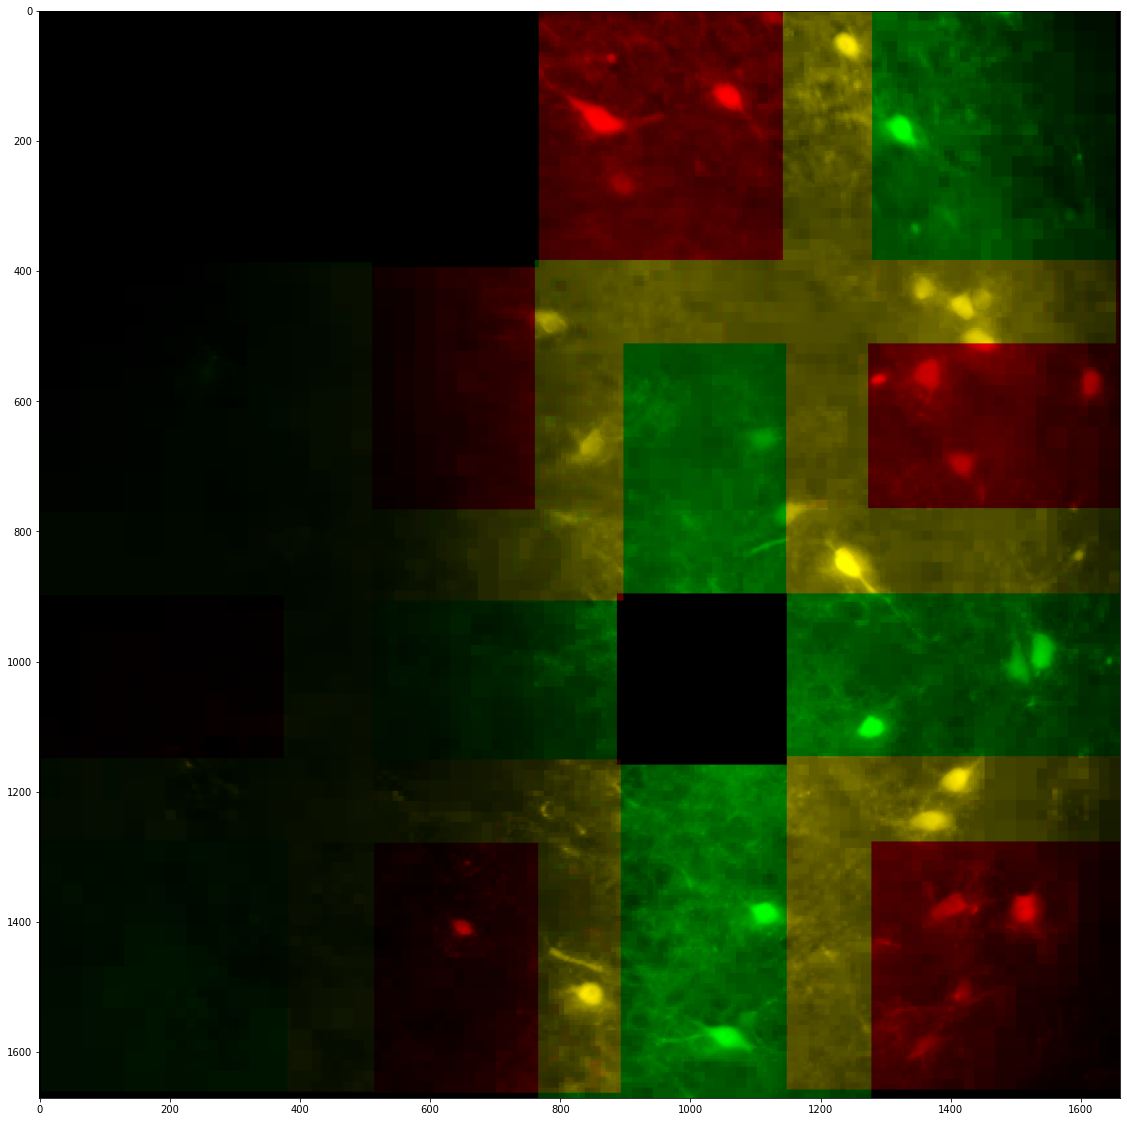

In [5]:
stitcher = pipapr.tileStitcher(tiles, overlap_h=25, overlap_v=25)
stitcher.set_overlap_margin(10)
stitcher.compute_registration(progress_bar=False)

_ = stitcher.reconstruct_slice(color=True, n_proj=10, progress_bar=False)

# The code below is only used to format the output image correctly for this tutorial and is not needed if used on your own machine
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

On the image above, the doubling artifacts are corrected. It is then possible to see the correct tile placement and save it. The ´database´ object is used by the rest of the pipeline by the viewer, merger and the segmenter to place tiles correctly.

In [7]:
print(stitcher.database)
# stitcher.save_database('path to saving location')

                               path  row  col    dH    dV   dD   ABS_H  \
0   ../../../tests/data/apr/0_2.apr    0    2   0.0   0.0  0.0   768.0   
1   ../../../tests/data/apr/0_3.apr    0    3   3.0   0.0  0.0  1143.0   
2   ../../../tests/data/apr/1_0.apr    1    0 -24.0  15.0  0.0     0.0   
3   ../../../tests/data/apr/1_1.apr    1    1 -10.0  23.0  0.0   386.0   
4   ../../../tests/data/apr/1_2.apr    1    2  -6.0  12.0  0.0   762.0   
5   ../../../tests/data/apr/1_3.apr    1    3   8.0  12.0  0.0  1148.0   
6   ../../../tests/data/apr/2_0.apr    2    0 -24.0  18.0  0.0     0.0   
7   ../../../tests/data/apr/2_1.apr    2    1 -20.0  23.0  0.0   376.0   
8   ../../../tests/data/apr/2_3.apr    2    3   9.0  21.0  0.0  1149.0   
9   ../../../tests/data/apr/3_0.apr    3    0 -21.0  33.0  0.0     3.0   
10  ../../../tests/data/apr/3_1.apr    3    1 -14.0  35.0  0.0   382.0   
11  ../../../tests/data/apr/3_2.apr    3    2  -1.0  43.0  0.0   767.0   
12  ../../../tests/data/apr/3_3.apr   

## Comparison of stitched and unstitched data

The cross sections can also be computed in other dimension (still using lazy loading) and compared between the stitched and unstitched data.

### Before Stitching

Merging: 100%|██████████| 4/4 [00:00<00:00, 32.53it/s]


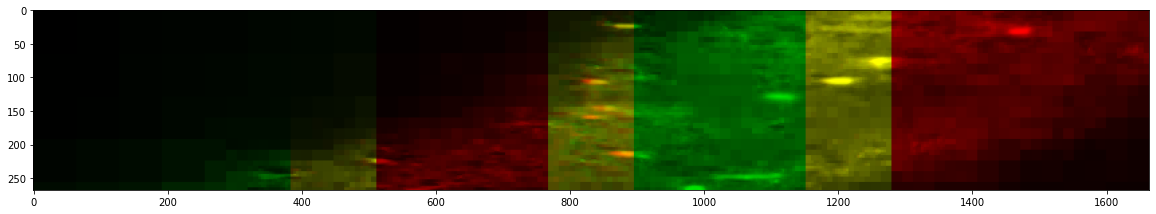

In [6]:
_ = stitcher_expected.reconstruct_slice(dim=1, loc=650, color=True, n_proj=10, progress_bar=False)

# The code below is only used to format the output image correctly for this tutorial and is not needed if used on your own machine
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

### After Stitching

Merging: 100%|██████████| 4/4 [00:00<00:00, 30.70it/s]


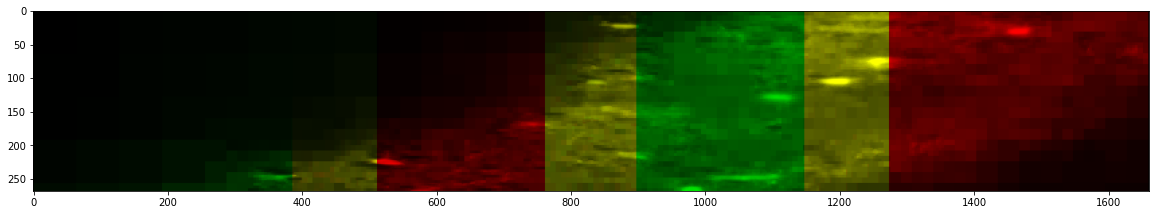

In [7]:
_ = stitcher.reconstruct_slice(dim=1, loc=650, color=True, n_proj=10, progress_bar=False)

# The code below is only used to format the output image correctly for this tutorial and is not needed if used on your own machine
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

### Before stitching

Merging: 100%|██████████| 6/6 [00:00<00:00, 53.54it/s]


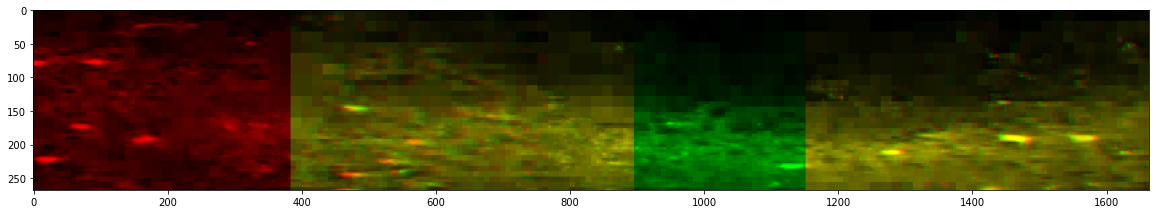

In [8]:
_ = stitcher_expected.reconstruct_slice(dim=2, loc=800, color=True, n_proj=10, progress_bar=False)

# The code below is only used to format the output image correctly for this tutorial and is not needed if used on your own machine
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

### After Stitching

Merging: 100%|██████████| 6/6 [00:00<00:00, 47.24it/s]


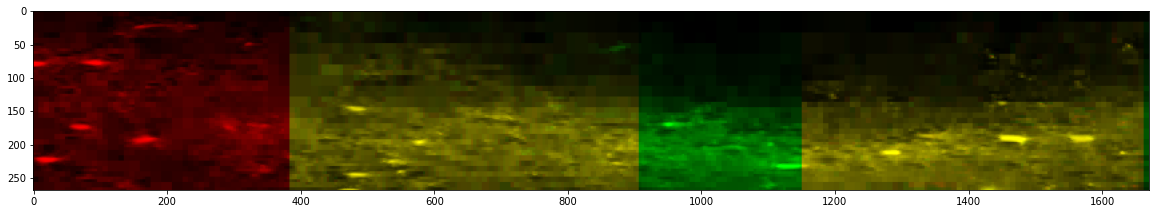

In [9]:
_ = stitcher.reconstruct_slice(dim=2, loc=800, color=True, n_proj=10, progress_bar=False)

# The code below is only used to format the output image correctly for this tutorial and is not needed if used on your own machine
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

## Color depth projection

It is also possible to display a color depth projection:

Merging: 100%|██████████| 13/13 [00:00<00:00, 23.34it/s]


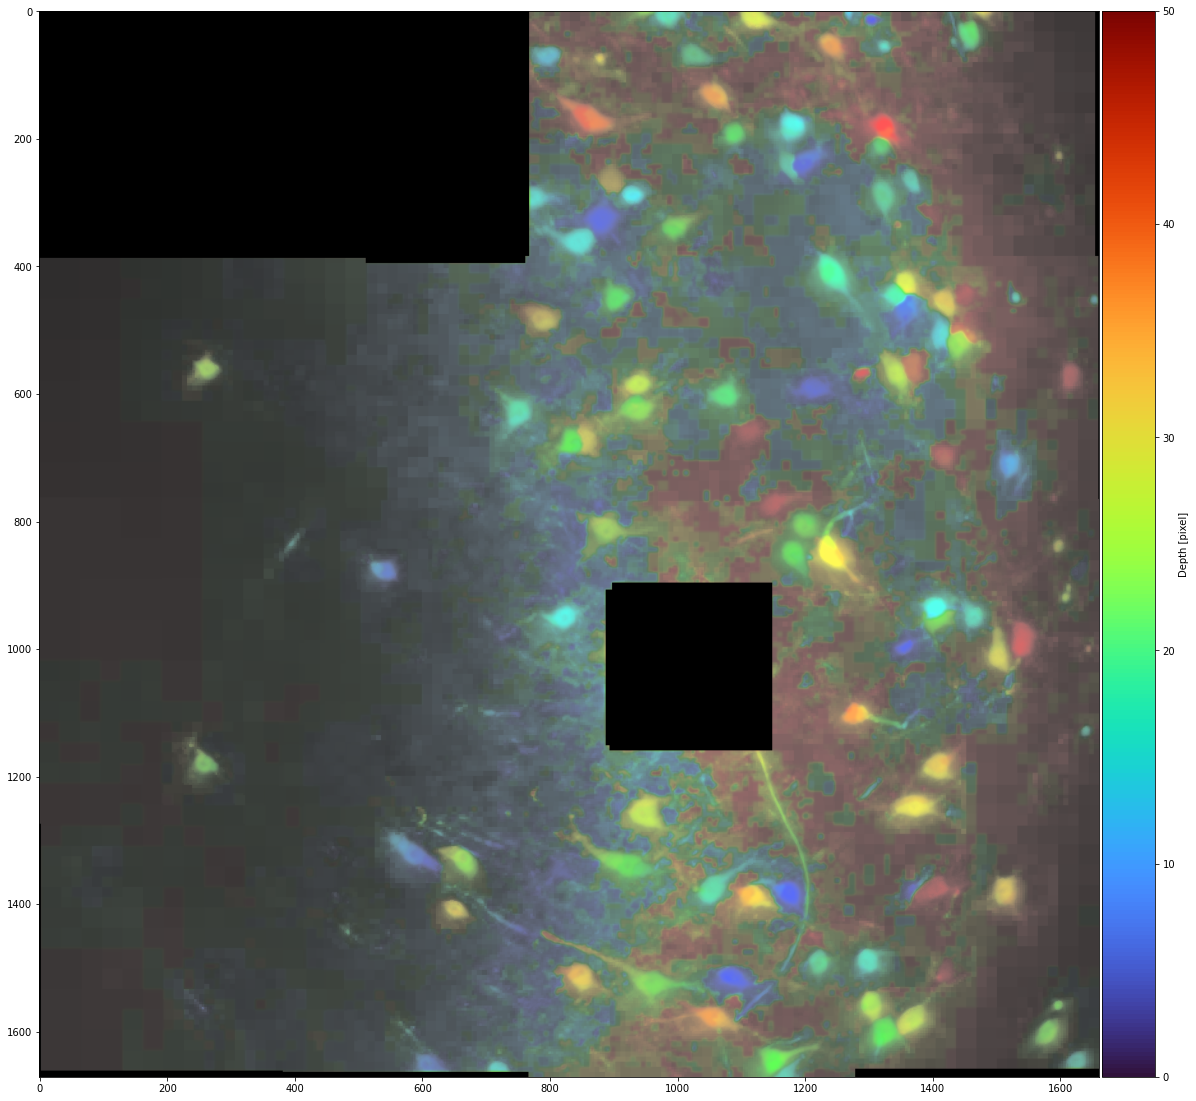

In [10]:
_ = stitcher.reconstruct_z_color(n_proj=50, progress_bar=False)

# The code below is only used to format the output image correctly for this tutorial and is not needed if used on your own machine
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)